<a href="https://colab.research.google.com/github/mateustui/IA/blob/main/trab02_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np 
import pandas as pd
import tensorflow as tf
import random
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Flatten, Dropout
from keras.utils import to_categorical
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

!kaggle datasets download -d prasunroy/natural-images

!unzip *.zip && rm *.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: natural_images/cat/cat_0204.jpg  
  inflating: natural_images/cat/cat_0205.jpg  
  inflating: natural_images/cat/cat_0206.jpg  
  inflating: natural_images/cat/cat_0207.jpg  
  inflating: natural_images/cat/cat_0208.jpg  
  inflating: natural_images/cat/cat_0209.jpg  
  inflating: natural_images/cat/cat_0210.jpg  
  inflating: natural_images/cat/cat_0211.jpg  
  inflating: natural_images/cat/cat_0212.jpg  
  inflating: natural_images/cat/cat_0213.jpg  
  inflating: natural_images/cat/cat_0214.jpg  
  inflating: natural_images/cat/cat_0215.jpg  
  inflating: natural_images/cat/cat_0216.jpg  
  inflating: natural_images/cat/cat_0217.jpg  
  inflating: natural_images/cat/cat_0218.jpg  
  inflating: natural_images/cat/cat_0219.jpg  
  inflating: natural_images/cat/cat_0220.jpg  
  inflating: natural_images/cat/cat_0221.jpg  
  inflating: natural_images/cat/cat_0222.jpg  
  inflating: natural_images/cat/cat_0223.jpg  
 

In [ ]:
sample_images = []
sample_labels = []
shape = (100,100)

sample_path = '/content/natural_images'


for filename in os.listdir('/content/natural_images/airplane'):
    if filename.split('.')[1]=='jpg':
        img = cv.imread(os.path.join('/content/natural_images/airplane', filename))
        sample_labels.append(filename.split('_')[0])
        img = cv.resize(img, shape)
        sample_images.append(img)

for filename in os.listdir('/content/natural_images/car'):
    if filename.split('.')[1]=='jpg':
        img = cv.imread(os.path.join('/content/natural_images/car', filename))
        sample_labels.append(filename.split('_')[0])
        img = cv.resize(img, shape)
        sample_images.append(img)

for filename in os.listdir('/content/natural_images/cat'):
    if filename.split('.')[1]=='jpg':
        img = cv.imread(os.path.join('/content/natural_images/cat', filename))
        sample_labels.append(filename.split('_')[0])
        img = cv.resize(img, shape)
        sample_images.append(img)

for filename in os.listdir('/content/natural_images/dog'):
    if filename.split('.')[1]=='jpg':
        img = cv.imread(os.path.join('/content/natural_images/dog', filename))
        sample_labels.append(filename.split('_')[0])
        img = cv.resize(img, shape)
        sample_images.append(img)

for filename in os.listdir('/content/natural_images/flower'):
    if filename.split('.')[1]=='jpg':
        img = cv.imread(os.path.join('/content/natural_images/flower', filename))
        sample_labels.append(filename.split('_')[0])
        img = cv.resize(img, shape)
        sample_images.append(img)

for filename in os.listdir('/content/natural_images/fruit'):
    if filename.split('.')[1]=='jpg':
        img = cv.imread(os.path.join('/content/natural_images/fruit', filename))
        sample_labels.append(filename.split('_')[0])
        img = cv.resize(img, shape)
        sample_images.append(img)

for filename in os.listdir('/content/natural_images/motorbike'):
    if filename.split('.')[1]=='jpg':
        img = cv.imread(os.path.join('/content/natural_images/motorbike', filename))
        sample_labels.append(filename.split('_')[0])
        img = cv.resize(img, shape)
        sample_images.append(img)

for filename in os.listdir('/content/natural_images/person'):
    if filename.split('.')[1]=='jpg':
        img = cv.imread(os.path.join('/content/natural_images/person', filename))
        sample_labels.append(filename.split('_')[0])
        img = cv.resize(img, shape)
        sample_images.append(img)


sample_labels = pd.get_dummies(sample_labels).values
sample_images = np.array(sample_images)

In [ ]:
os.listdir(sample_path)

['airplane', 'cat', 'fruit', 'dog', 'person', 'motorbike', 'car', 'flower']

In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(sample_images, sample_labels , test_size=0.33, random_state=42)

[0 1 0 0 0 0 0 0]


4622

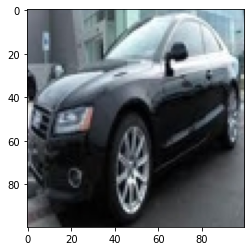

In [ ]:
i_train=random.randint(0,len(train_labels))
print(train_labels[i_train])
plt.imshow(cv.cvtColor(train_images[i_train], cv.COLOR_BGR2RGB))
len(train_labels)

[0 0 0 1 0 0 0 0]


2277

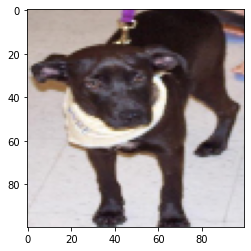

In [ ]:
i_test=random.randint(0,len(test_labels))
print(test_labels[i_test])
plt.imshow(cv.cvtColor(test_images[i_test], cv.COLOR_BGR2RGB))
len(test_labels)

In [ ]:
model = Sequential()
model.add(Conv2D(kernel_size = (3,3), filters = 30,activation = 'tanh', input_shape = (100,100,3)))
model.add(Conv2D(filters = 30, kernel_size = (3,3), activation = 'tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters = 30, kernel_size = (3,3), activation = 'tanh'))
model.add(MaxPool2D(3,3))

model.add(Conv2D(kernel_size = (3,3), filters = 30,activation = 'tanh', input_shape = (100,100,3)))
model.add(Conv2D(filters = 30, kernel_size = (3,3), activation = 'tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters = 30, kernel_size = (3,3), activation = 'tanh'))
model.add(MaxPool2D(3,3))

model.add(Flatten())
model.add(Dense(20, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(8, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
             metrics = ['acc'],
             optimizer = 'adam')

In [ ]:
history = model.fit(train_images,train_labels,epochs=30, batch_size = 100, validation_data=(test_images,test_labels))

Epoch 1/30
47/47 [==============================] - 145s 3s/step - loss: 1.9044 - acc: 0.2467 - val_loss: 1.5901 - val_acc: 0.4111
Epoch 2/30
47/47 [==============================] - 144s 3s/step - loss: 1.4153 - acc: 0.5105 - val_loss: 1.3225 - val_acc: 0.5621
Epoch 3/30
47/47 [==============================] - 144s 3s/step - loss: 1.1739 - acc: 0.6179 - val_loss: 1.0588 - val_acc: 0.6636
Epoch 4/30
47/47 [==============================] - 144s 3s/step - loss: 0.9980 - acc: 0.6775 - val_loss: 1.0058 - val_acc: 0.6711
Epoch 5/30
47/47 [==============================] - 144s 3s/step - loss: 0.8772 - acc: 0.7086 - val_loss: 0.8878 - val_acc: 0.7088
Epoch 6/30
47/47 [==============================] - 145s 3s/step - loss: 0.7362 - acc: 0.7433 - val_loss: 0.6825 - val_acc: 0.7655
Epoch 7/30
47/47 [==============================] - 143s 3s/step - loss: 0.6423 - acc: 0.7784 - val_loss: 0.6412 - val_acc: 0.7769
Epoch 8/30
47/47 [==============================] - 142s 3s/step - loss: 0.5542 - a

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization ca be applied by setting 'normalize = True'.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.figure(figsize = (12, 8))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha = 'center', va = 'center',
                     color = 'white' if (cm[i, j] > thresh) else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # plt.yticks(tick_marks, classes)
    plt.show()

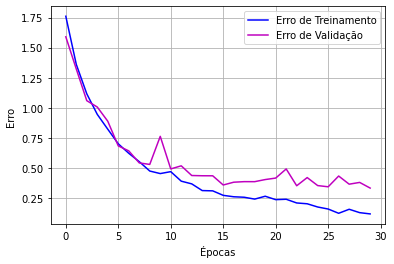

In [ ]:
plt.plot(history.history['loss'], "-b", label="Erro de Treinamento")
plt.plot(history.history['val_loss'], "-m", label="Erro de Validação")
plt.legend(loc="upper right")
plt.grid()
plt.xlabel('Épocas')
plt.ylabel('Erro ')
plt.show()

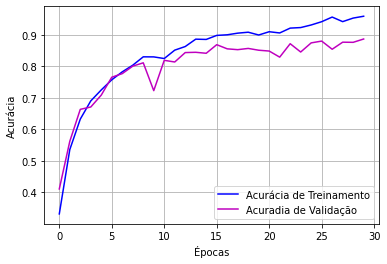

In [ ]:
plt.plot(history.history['acc'], "-b", label="Acurácia de Treinamento")
plt.plot(history.history['val_acc'], "-m", label="Acuradia de Validação")
plt.grid()
plt.legend(loc="lower right")
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.show()

In [ ]:
rounded_labels=np.argmax(test_labels, axis=1)
rounded_labels[1]

2

In [ ]:
ypred = model.predict(test_images).argmax(axis = 1)
cm = confusion_matrix(rounded_labels, ypred)


In [ ]:
cm

array([[236,   6,   4,   4,   3,   0,   1,   0],
       [  4, 311,   2,   3,   2,   1,   7,   0],
       [  2,   1, 214,  46,  16,   6,   0,   1],
       [  5,   1,  69, 137,  17,   2,   4,   1],
       [  2,   1,   3,   6, 251,  11,   3,   0],
       [  0,   0,   1,   0,   2, 307,   0,   0],
       [  3,   6,   0,   2,   1,   0, 222,   0],
       [  0,   0,   2,   5,   2,   0,   0, 341]])

Confusion matrix, without normalization


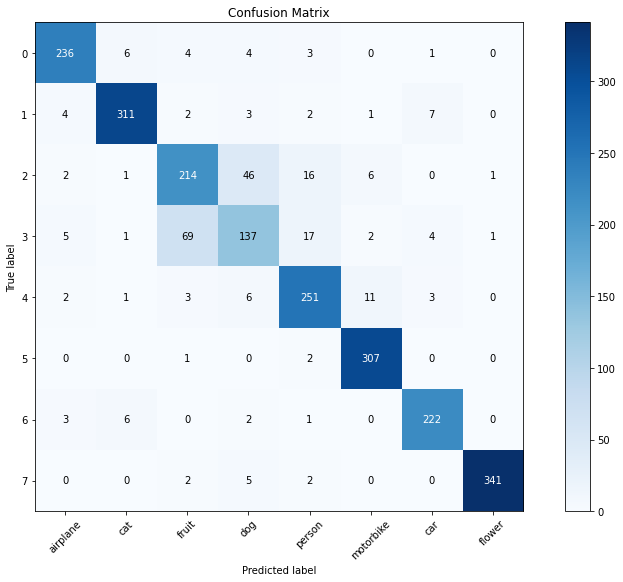

In [ ]:
plot_confusion_matrix(cm,os.listdir(sample_path))